In [1]:
import pandas as pd 
import sklearn as sk
import numpy as np

import re
import string
import nltk
from nltk.corpus import stopwords

#Aca es donde tienen que poner el path asociado a donde tengan guardado
#el arhcivo del embedding de GLoVE. Tienen que bajarlo de:
#http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
path_glove='/home/tomas/organizacion_de_datos/tp2/glove.6B.100d.txt'

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


/home/tomas/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tomas/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tomas/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tomas/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/tomas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/tomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tomas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
from nltk.stem.snowball import SnowballStemmer

In [4]:
stemmer=SnowballStemmer(language='english')

In [5]:
def stemmizar_texto(texto):
    texto=' '.join([stemmer.stem(palabra) for palabra in texto.split() ])
    return texto


In [6]:
english_stopwords=set(stopwords.words('english'))

In [7]:
train_set=pd.read_csv("train.csv",encoding='utf-8')

In [9]:
def pasar_a_string(texto):
    return str(texto)

In [12]:
train_set['text']=train_set['text'].apply(pasar_a_string)

NameError: name 'pasar_a_string' is not defined

In [8]:
test_set=pd.read_csv("test.csv",encoding='utf-8')

## Red neuronal profunda, NLP, preprocesamiento de texto, análisis realizado usando como único feature el texto del tweet

Análisis con preprocesamiento de los textos:
En el caso anterior se tomo simplemente los textos sin preprocesar. Que pasaria si remuevo las palabras mas comunes, las url que aparecen, las llamadas con arroba a otros usuarios, pues no tienen que ver con si el contenido del tweet es verdadero o no


### Procesamiento del texto

In [9]:
def quitar_stopwords(texto):
    texto=' '.join([word for word in texto.split() if word not in english_stopwords])
    return texto

In [10]:
def quitar_menciones(texto):
    texto=' '.join([palabra for palabra in texto.split() if '@' not in palabra])
    return texto

In [11]:
Diccionario_de_lenguaje_de_internet={
"2day": "Today",
"2moro": "Tomorrow",
"2nite": "Tonight",
"4EAE": "For Ever And Ever",
"ABT":"About",
"ADN": "Any Day Now",
"AFAIC": "As Far As I’m Concerned",
"AFAICT": "As Far As I Can Tell",
"AFAIK": "As Far As I Know",
"AFAIR": "As Far As I Remember",
"AKA": "Also Known As",
"AMA": "Ask Me Anything",
"ASAIC": "As Soon As I Can",
"ASAP": "As Soon As Possible",
"ATM": "At The Moment",
"B4": "Before",
"B4N": "Bye For Now",
"Bae": "Babe/Before Anyone Else",
"BBL": "Be Back Later",
"BBT": "Be Back Tomorrow",
"BCNU": "Be Seeing You",
"BD": "Big Deal",
"BF": "Boyfriend",
"BFF": "Best Friends Forever",
"BMT": "Before My Time",
"BOL": "Be On Later",
"BOT": "Back On Topic",
"BRB": "Be Right Back",
"BRO": "Brother",
"BT": "But",
"BTW": "By The Way",
"CFY": "Calling For You",
"CU": "See You",
"CUL": "See You Later",
"Cuz": "Because",
"CYA": "Cover Your Ass",
"DAE": "Does Anyone Else",
"DBA": "Doing Business As",
"DFTBA": "Don’t Forget To Be Awesome",
"DIKU": "Do I Know You",
"DM": "Direct Message",
"DND": "Do Not Disturb",
"DR": "Double Rainbow",
"DWBH": "Don’t Worry, Be Happy",
"ELI5": "Explain Like I’m 5",
"EOM": "End Of Message",
"EOS": "End Of Story",
"F2F": "Face To Face",
"FAQ": "Frequently Asked Question",
"FB": "Facebook",
"FBF": "Flash Back Friday",
"FF": "Follow Friday",
"FIFY": "Fixed It For You",
"FITB": "Fill In The Blank",
"FML": "Fuck My Life",
"FOMO": "Fear Of Missing Out",
"FTFY": "Fixed That For You",
"FTL": "For The Loss",
"FTW": "For The Win",
"FWB": "Friends With Benefits",
"FWIW": "For What It’s Worth",
"FYE": "For Your Entertainment",
"FYEO": "For Your Eyes Only",
"FYI": "For Your Information",
"GA": "Go Ahead",
"GAL": "Get A Life",
"GF": "Girlfriend",
"GM": "Good Morning",
"GN": "Good Night",
"Gr8": "Great",
"GTR": "Getting Ready",
"HAND": "Have A Nice Day",
"HB": "Hurry Back",
"HBD": "Happy Birthday",
"HBU": "How About You",
"HMB": "Hit Be Back",
"HMU": "Hit Me Up",
"HRU": "How Are You",
"HTH": "Hope This Helps",
"IAC": "In Any Case",
"IC": "I See",
"ICYMI": "In Case You Missed It",
"IDC": "I Don’t Care",
"IDK": "I Don’t Know",
"IG": "Instagram",
"IIRC": "If I Remember Correctly",
"IKR": "I Know Right",
"ILY": "I Love You",
"IMHO": "In My Humble Opinion",
"IMMD": "It Made My Day",
"IMY": "I Miss You",
"IRL": "In Real Life",
"IS": "I’m Sorry",
"ISO": "In Search Of",
"IU2U": "It’s Up To You",
"J4F": "Just For Fun",
"JAM": "Just A Minute",
"JFY": "Just For You",
"JIC": "Just In Case",
"JK": "Just Kidding",
"JSYK": "Just So You Know",
"KK": "Okay",
"L8": "Late",
"L8R": "Later",
"LMA": "Leave Me Alone",
"LMAO": "Laughing My Ass Off",
"LMBO": "Laughing My Butt Off",
"LMK": "Let Me Know",
"LOL": "Laugh Out Loud",
"LTNS": "Long Time No See",
"LYLAS": "Love You Like A Sister",
"M/F": "Male or Female",
"M8": "Mate",
"MP": "My pleasure",
"MSM": "Mainstream Media",
"MU": "Miss You",
"MYOB": "Mind Your Own Business",
"NAGI": "Not A Good Idea",
"NBD": "No Big Deal",
"NE1": "Anyone",
"NM": "Not Much",
"NP": "No Problem",
"NSFL": "Not Safe For Life",
"NSFW": "Not Safe For Work",
"NTS": "Note To Self",
"NVM": "Never Mind",
"OC": "Original Content",
"OH": "Overheard",
"OIC": "Oh ! I See",
"OMD": "Oh My Damn",
"OMG": "Oh My Goodness",
"OMW": "On My Way",
"OT": "Off Topic",
"OFC": "Of course",
"PAW": "Parents Are Watching",
"Pls": "Please",
"POTD": "Photo Of The Day",
"POV": "Point Of View",
"PPL": "People",
"PTB": "Please Text Back",
"Q4U": "Question For You",
"QQ": "Crying",
"RBTL": "Read Between The Lines",
"RIP": "Rest In Peace",
"RL": "Real Life",
"ROFL": "Rolling On the Floor Laughing",
"RT": "Retweet",
"RTM": "Read The Manual",
"SIS": "Sister",
"SITD": "Still In The Dark",
"SM": "Social Media",
"SMH": "Shaking My Head",
"SMY": "Somebody",
"SNH": "Sarcasm Noted Here",
"SOL": "Sooner Or Later",
"Some1": "Someone",
"SRSLY": "Seriously",
"STBY": "Sucks To Be You",
"Str8": "Straight",
"SYS": "See You Soon",
"TBA": "To Be Announced",
"TBH": "To Be Honest",
"TBT": "Throwback Thursday",
"TBT": "Truth Be Told",
"TFH": "Thread From Hell",
"TFTI": "Thanks For The Invite",
"TGIF": "Thank God It’s Friday",
"THX": "Thanks",
"TIA": "Thanks in Advance",
"TIL": "Today I Learned",
"TL;DR": "Too Long; Didn’t Read",
"TLDR":"Too long didn’t read",
"TL DR":"Too long didn’t read",
"TLC": "Tender Loving Care",
"TMI": "Too Much Information",
"TTYL": "Talk To You Later",
"TTYS": "Talk To You Soon",
"Txt": "Text",
"TYVM": "Thank You Very Much",
"U": "You",
"U4F": "You Forever",
"UR": "Your",
"VBG": "Very Big Grin",
"VSF": "Very Sad Face",
"WB": "Welcome Back",
"WBU": "What About You?",
"WEG": "Wicked Evil Grin",
"WKND": "Weekend",
"WOM": "Word of Mouth",
"WOTD": "Word Of The Day",
"Wru": "Who Are You",
"WTH": "What The Heck?",
"WTPA": "Where The Party At?",
"WU?": "What's Up",
"WU":"What's Up",
"WYCM": "Will You Call Me?",
"WYWH": "Wish You Were Here",
"XOXO": "Hugs and Kisses",
"YGM": "You’ve Got Mail",
"YNK": "You Never Know",
"YOLO": "You Only Live Once",
"YT": "YouTube",
"YW": "You’re Welcome",
}

In [12]:
def reemplazar_lenguaje_internet(texto):
    texto=texto.upper()
    palabras=texto.split()
    palabras_procesadas=[]
    for palabra in palabras:
        traduccion=Diccionario_de_lenguaje_de_internet.get(palabra,'not internet slang')
        if(traduccion!='not internet slang'):
            lista_aux=traduccion.split()
            for x in lista_aux:
                palabras_procesadas.append(x.lower())
        else:
            palabras_procesadas.append(palabra.lower())
    texto=' '.join([word for word in palabras_procesadas])
    return texto

In [13]:
diccionario_contracciones = {  "ain't": "is not",
                               "aint":"is not",
                               "aren't": "are not",
                               "arent":"are not",
                               "can't": "can not",
                               "cant":"can not",
                               "cause": "because",
                               "could've": "could have",
                               "couldve":"could have",
                               "couldn't": "could not",
                               "couldnt":"could not",
                               "didn't": "did not", 
                               "didnt":"did not",
                               "doesn't": "does not",
                               "doesnt":"does not",
                               "don't": "do not",
                               "dont":"do not",
                               "hadn't": "had not",
                               "hadnt":"had not",
                               "hasn't": "has not",
                               "hasnt":"has not",
                               "haven't": "have not",
                               "havent":"have not",
                               "he'd": "he would",
                               "hed":"he would",
                               "he'll": "he will",
                               "he ll":"he will",
                               "he's": "he is",
                               "hes":"he is",
                               "how'd": "how did",
                               "howd":"how did",
                               "how'd'y": "how do you",
                               "howdy":"how do you",
                               "how'll": "how will",
                               "howll":"how will",
                               "how's": "how is",
                               "hows":"how is",
                               "I'd": "I would",
                               "id":"i would",
                               "I'd've": "I would have",
                               "idve":"i would have",
                               "I'll": "I will", 
                               "Ill":"i will", #duda: si algun tweet habla de un enfermo puede traer ruido
                               "I'll've": "I will have",
                               "I'm": "I am", 
                               "im":"i am",
                               "I've": "I have",
                               "ive":"i have",
                               "i'd": "i would",
                               "i'd've": "i would have",
                               "i'll": "i will",
                               "i'll've": "i will have",
                               "i'm": "i am", 
                               "im":"i am",
                               "i've": "i have",
                               "isn't": "is not",
                               "isnt":"is not",
                               "it'd": "it would",
                               "itd":"it would",
                               "it'd've": "it would have",
                               "it'll": "it will",
                               "itll":"it will",
                               "it'll've": "it will have",
                               "it's": "it is",
                               "its":"it is",
                               "let's": "let us",
                               "lets":"let us",
                               "ma'am": "madam",
                               "maam":"madam",
                               "mayn't": "may not",
                               "maynt":"may not",
                               "might've": "might have",
                               "mightve":"might have",
                               "mightn't": "might not",
                               "mightnt":"might not",
                               "mightn't've": "might not have",
                               "must've": "must have",
                               "mustve":"must have",
                               "mustn't": "must not",
                               "mustnt":"must not",
                               "mustn't've": "must not have",
                               "needn't": "need not",
                               "neednt":"need not",
                               "needn't've": "need not have",
                               "o'clock": "of the clock",
                               "oclock":"of the clock",
                               "oughtn't": "ought not",
                               "oughtnt":"ought not",
                               "oughtn't've": "ought not have",
                               "shan't": "shall not",
                               "shant":"shall not",
                               "sha'n't": "shall not",
                               "shan't've": "shall not have",
                               "she'd": "she would",
                               "shed":"she would",
                               "she'd've": "she would have",
                               "she'll": "she will",
                               "shell":"she will",#nuevamente aca tengo ruido por dos palabras igual escritas
                               "she'll've": "she will have", 
                               "she's": "she is",
                               "shes":"she is",
                               "should've": "should have",
                               "shouldve":"should have",
                               "shouldn't": "should not",
                               "shouldnt": "should not",
                               "shouldn't've": "should not have",
                               "so've": "so have",
                               "so's": "so as",
                               "this's": "this is",
                               "that'd": "that would",
                               "that'd've": "that would have",
                               "that's": "that is",
                               "thats":"that is",
                               "there'd": "there would",
                               "thered":"there would",
                               "there'd've": "there would have",
                               "there's": "there is",
                               "theres":"there is",
                               "here's": "here is",
                               "heres":"here is",
                               "they'd": "they would",
                               "theyd":"they would",
                               "they'd've": "they would have",
                               "they'll": "they will",
                               "theyll":"they will",
                               "they'll've": "they will have", 
                               "they're": "they are",
                               "theyre":"they are",
                               "they've": "they have", 
                               "theyve":"they have",
                               "to've": "to have", 
                               "tove":"to have",
                               "wasn't": "was not",
                               "wasnt":"was not",
                               "we'd": "we would",
                               "wed":"we would",#aca nuevamente hay conflicto
                               "we'd've": "we would have",
                               "we'll": "we will",
                               "we'll've": "we will have",
                               "we're": "we are",
                               "we've": "we have",
                               "weren't": "were not",
                               "werent":"were not",
                               "what'll": "what will",
                               "whatll":"what will",
                               "what'll've": "what will have",
                               "what're": "what are", 
                               "whatre":"what are",
                               "what's": "what is",
                               "whats":"what is",
                               "what've": "what have",
                               "whatve":"what have",
                               "when's": "when is",
                               "whens":"when is",
                               "when've": "when have",
                               "whenve":"when have",
                               "where'd": "where did",
                               "whered":"where did",
                               "where's": "where is",
                               "wheres":"where is",
                               "where've": "where have",
                               "whereve":"where have",
                               "who'll": "who will", 
                               "wholl":"who will",
                               "who'll've": "who will have",
                               "who's": "who is",
                               "whos":"who is",
                               "who've": "who have",
                               "whove":"who have",
                               "why's": "why is",
                               "whys":"why is",
                               "why've": "why have",
                               "whyve":"why have",
                               "will've": "will have",
                               "willve":"will have",
                               "won't": "will not",
                               "wont":"will not",
                               "won't've": "will not have",
                               "would've": "would have",
                               "wouldve":"would have",
                               "wouldn't": "would not",
                               "wouldnt":"would not",
                               "wouldn't've": "would not have",
                               "y'all": "you all",
                               "yall":"you all",
                               "y'all'd": "you all would",
                               "yalld":"you all would",
                               "y'all'd've": "you all would have",
                               "y'all're": "you all are",
                               "yallre":"you all are",
                               "y'all've": "you all have",
                               "you'd": "you would",
                               "youd":"you would",
                               "you'd've": "you would have",
                               "you'll": "you will",
                               "youll":"you will",
                               "you'll've": "you will have",
                               "you're": "you are",
                               "youre":"you are",
                               "you've": "you have",
                               "youve":"you have"}


In [14]:
def reemplazar_contracciones(texto):
    texto=texto.lower()
    palabras=texto.split()
    palabras_procesadas=[]
    for palabra in palabras:
        traduccion=diccionario_contracciones.get(palabra,'no es contraccion')
        if(traduccion!='no es contraccion'):
            lista_aux=traduccion.split()
            for x in lista_aux:
                palabras_procesadas.append(x.lower())
        else:
            palabras_procesadas.append(palabra.lower())
    texto=' '.join([word for word in palabras_procesadas])
    return texto

In [15]:
diccionario_separador={
    'supporthealthhomebathroomsupportelderlyinjuredsû':"support health home bathrooms support elderly injured",
    'rockefellerchirockefellerunivheiress': 'Rockefeller chi Rockefeller university heiress',
    "choppergatebronwynbishopauspol":"chopper-gate Browyn Bishop Australia politician",
    "thisiswhywecanthavenicethings":"this is why we cant have nice things",
    "preparedelectrocutedboiling":"prepared electrocuted boiling",
    "theresmorewherethatcamefrom":"there is more where that came from",
    "toxiccancerdiseasehazardous":"toxic cancer disease hazardous",
    "debatequestionswewanttohear":"debate questions we want to hear",
    "noonancindynoonanheartbreak":"Noonan Cindy Noonan Heartbreak",
    "cantwaittoplayinminneapolis":"cant wait to play in Minneapolis",
    "measuresarrestpastornganga":"measures against pastor Nganga",
    "creativitybalancelongevity":"creativity balance longevity",
    "worldnetdailyhomosexuality":"WorldNetDaily homosexuality",
    "givebackkalinwhiteaccount":"give back Kalin White account",
    "nuclearbiologicalchemical":"nuclear biological chemical",
    "freesikhpoliticalprisnors":"free Sikh political prisoners",
    "organizationsfluctuations":"organizations fluctuations",
    "newbeginningsanimalrescue":"new beginnings animal rescue",
    "questionfatalityflawless":"question fatality flawless",
    "refugeesvictimiserdutton":"refugees victimizer Dutton",
    "bathandnortheastsomerset":"Bath and North East Somerset",
    "catastrophicfallenangel":"catastrophic fallen angel",
    "areavoluntaryinciwebmad":"area voluntary Inciweb Mad",
    "postapocalypticflimflam":"post-apocalyptic Flim-Flam",
    "speakingfromexperience":"speaking from experience",
    "belowthemasondixonline":"below the Mason Dixon Land",
    "undergroundbestsellers":"Underground bestseller",
    "displacedinjuredkilled":"displaced injured killed",
    "weallheartonedirection":"we all love One Direction",
    "antiochhickoryhollowtn":"Antioch Hickory Hollow Tennesse",
    "hijackerturnedsattutor":"hijacker turned SAT tutor",
    "growingupincoloradoû":"growing up in Colorado",
    "ayhhhhhdjjfjrjjrdjjeks":" ",
    "thatswhatfriendsarefor":"that is what friends are for",
    "aberystwythshrewsbury":"Aberystwyth Shrewsbury" ,#welsh football
    "oneheartonemindonecss":"one heart one mind one CSS",#singapore army
    "marketingåêmediocrity":"marketing a mediocrity",
    "fuckfacewineisdumbcom":"fuck face wine is dumb",
    "wereonadesolateplanet":"we are on a desolate planet",
    "abuseddesolateamplost":"abused desolate and lost",
    "pictwittercompnpizody":"picture twitter",#no se que es lo que sigue, no lo encontre
    "texaschainsawmassacre":"Texas Chainsaw Massacre",
    "yazidishingalgenocide":"Yazidis genocide",#esto paso en irak
    "richelieusaintlaurent":"Richelieu Saint Laurent",#producto
    "evangelicalliarabbott":"evangelical liar Abbott",
    "catholicismhomophobia":"catholicism homophobia",
    "keepingtheviginaclean":"keeping the vagina clean",
    "indiakomuntorjawabdo":"India komunt or jawabdo",
    "streamyxhomesouthern":"Streamyx home southern",
    "artisteoftheweekfact":"artist of the week fact",
    "decisionsondecisions":"decisions on decisions",
    "legionstrackandfield":"Legion track and field",#esto es de canada
    "shantaehalfgeniehero":"Shantae half genie hero",#videojuego
    "gobsmackeddevastated":"gobsmacked devastated",
    "westerncanadadrought":"western Canada drought",
    "ggindependencmessage":"good game independence message",
    "actionmoviestaughtus":"action movies taught us",
    "santanicopandemonium":"satanic pandemonium",
    "hawaiianpaddlesports":"Hawaiian paddle sports",
    "worldwatchesferguson":"world watches Ferguson",
    "tantonationalforest":"Tonto national forest",
    "saltriverwildhorses":"Salt River wild horses",
    "interestraterise":"interest rate rise",
    "wbioterrorismampuse":"weapon bioterrism use",
    "trollingtilmeekdiss":"trolling until meek diss",
    "talkecologyamphuman":"talk ecology human",
    "appreciativeinquiry":"appreciative inquiry",
    "spillevacuationsred":"spill evacuations red",
    "ltbgtchocolateltbgt":"LGBT chocolate LGBT",
    "peritoengrafoscopia":"licensed in graphology",
    "adiossuperbacterias":"bye super bacteries",
    "theconspiracytheory":"the conspiracy theory",
    "alcoholismaddiction":"alcoholism addiction",
    "hotteennsfwpornmilf":"hot teens porn MILF",
    "peoplecommunication":"people communication",
    "conditionsprivation":"conditions privation",
    "protectdenaliwolves":"protected Denali wolves",
    "carlilescanoelivery":"Carlisle canoe livery",
    "internallydisplaced":"internally displaced",
    "greatbritishbakeoff":"Great British Bake Off",
    "legionnairesdisease":"Legionnaires disease",
    "deadgrassandflowers":"dead grass and flowers",
    "undergroundrailraod":"underground railroad",
    "nochilllukehammings":"no chill Luke Hemmings",
    "gameplaywalkthrough":"gameplay walkthrought",
    "mothernaturenetwork":"Mother Nature Network",#nombre de una cadena de television
    "thunderstormtornado":"thunder storm tornado",
    "rescueadoptionlocal":"rescue adoption local",
    "uncertaintyeconomic":"uncertainty economic",
    "volcanoåêinåêrussia":"volcano in Russia",
    "kebabtahinipickles":"kebab tahini pickles",
    "withåêannihilation":"with annihilation",
    "infectiousdiseases":"infectious diseases",
    "thisispublichealth":"this is public health",
    "harperanetflixshow":"Harper a Netflix show",
    "piperwearsthepants":"piper wears the pants",
    "katterpì´instagram":"katterpi instagram",
    "booradleyvancullen":"Boo Radley van cullen",
    "ûïthehighfessions":"the high confessions",
    "thesteveharveyshow":"The Steve Harvey Show",
    "rewatchingthepilot":"re-watching the pilot",
    "iwasdisappointedby":"i was dissappointed by",
    "scseestapreparando":"SC is getting ready",
    "darkstormytidalsea":"dark stormy tidal sea",
    "referencereference":"reference reference",
    "thepartyofmeanness":"the party of meanness",
    "bangladeshaffected":"Bangladesh affected",
    "offensiveåêcontent":"offensive content",
    "northerncalifornia":"Northern California",
    "championsblackfoot":"champions Blackfoot",
    "accidentalprophecy":"accidental prophecy",
    "cadenadeseguidores":"chain of followers",
    "snowstormhailstorm":"snowstorm hailstorm",
    "arrestpastornganga":"arrest pastor Nganga",
    "prettyboyshyflizzy":"pretty boy Shy Glizzy",
    "lavenderpoetrycafe":"lavender poetry cafe",
    "troubleniallhariss":"trouble Nial Hariss",
    "twisterlovesshania":"twister loves shania",
    "foxdebatequestions":"Fox debate questions",
    "windstormåêinsurer":"windstorm insurer",
    "hailstormwindstorm":"hailstorm windstorm",
    "explodingkittensû":"exploding kittens",
    "caraccidentlawyer":"car accident lawyer",
    "ûïleoblakecarter":"leo blake carter",
    "preseasonworkouts":"preseason workouts",
    "coloradoavalanche":"Colorado avalanche",
    "youngerampgrossly":"younger grossly",
    "elephantintheroom":"elephant in the room",
    "underwritersenior":"underwriter senior",
    "changefortheworse":"change for the worse",
    "derailedbenchmark":"derailed benchmark",
    "desolationofsmaug":"desolation of Smaug",
    "connectorconnecto":"connector connect",
    "indianperpetrated":"Indian perpetrated",
    "typhoondevastated":"typhoon devastated",
    "hiroshimanagasaki":"Hiroshima Nagasaki",
    "strategicpatience":"strategic patience",
    "socialmediadriven":"social media driven",
    "û÷exceptionalûª":"exceptional",
    "cactusborderlands":"cactus borderlands",
    "archipelagowolves":"Archipielago wolves",
    "imkeepingmydayjob":"i am keeping my day job",
    "siteinvestigating":"site investigating",
    "doingûahhhûthat":"doing that",
    "dontexpectnothing":"do not expect nothing",
    "bigåêconsequences":"big consequences",
    "notgoingoutinthat":"not going out in that",
    "plannedparenthood":"planned parenthood",
    "deejayempiresound":"DJ empire sound",
    "browseråêhijacker":"browser hijacker",
    "ratingscategories":"ratings categories",
    "jeffersonampdoris":"Jefferson Doris",
    "vancouveråêisland":"Vancouver Island",#canada supongo
    "standardanonymous":"standard anonymous",
    "hamptonroadsforme":"Hampton roads for me",
    "jaylenejoybeligan":"jaylene joy beligan",
    "onlinecommunities":"online communities",
    "triciaoneillphoto":"tricia o neil photo",
    "smugglersåênabbed":"smugglers nabbed",
    "crazyideascollege":"crazy ideas college",
    "sidjsjdjekdjskdjd":" ",
    "publicityalthough":"publicty although",
    "destinationimpact":"destination impact",
    "ûïlordbrathwaite":"lord Brathwaite",
    "indistinguishable":"indistinguishable",
    "homessponsorships":"homes sponsorships",
    "transgenerational":"transgenerational",
    "intragenerational":"intragenerational",
    "profittothepeople":"profit to the people", 
    "carolinaåêablaze":"Carolina ablaze",
    "nashvilletraffic":"Nashville traffic",
    "growingupspoiled":"growing up spoiled",
    "signatureschange":"signatures change",
    "transcendblazing":"transcend blazing",
    "revolutionblight":"revolution blight",
    "thisdayinhistory":"this day in history",
    "blacklivesmatter":"black lives matter",
    "ppsellsbabyparts":"Planned Parenthood sells baby parts",
    "blacklivesmatter":"black lives matter",
    "francisunderwood":"Francis Underwood",
    "propertycasualty":"property casualty",
    "savedenaliwolves":"save Denali wolves",
    "femalegilgameshs":"female Gilgamesh",
    "crashsterlingwho":"crash Sterling who",
    "salyersblairhall":"Salyers blair hall",
    "yahoofinancehope":"Yahoo finance hope",
    "modestmouseremix":"Modest Mouse remix",
    "lncolyellowstone":"Lincoln Yellowstone",
    "ausinstarchitect":"Australian institute architect",
    "cdcwhistleblower":"CDC whistleblower",
    "infectionsdeaths":"infections deaths",
    "notrocketscience":"not rocket science",
    "contentmarketing":"content marketing",
    "abbruchsimulator":"demolition simulator",
    "blacklivesmatter":"black lives matter",
    "institutionalize":"institutionalize",
    "streetjamzdotnet":"street jamz net",
    "megadethsymphony":"Megadeth symphony",
    "detonateampshots":"detonate shots",
    "û÷devastatedûª":"devastated",
    "disasterrecovery":"disaster recovery",
    "disastereoficial":"disaster official",
    "expressioncheeks":"expression cheeks",
    "wouldelectrocute":"would electrocute",
    "rowysolouisville":"rowy so Louiseville",
    "famineåêmemories":"famine memories",
    "luchaunderground":"underground fight",
    "robertcalifornia":"Robert California",
    "particulatebreak":"particulate break",
    "naturaldisasters":"natural disaster",
    "humanconsumption":"human consumption",
    "multidimensional":"multidimensional",
    "humanconsumption":"humanconsumption",
    "flavorchargedtea":"flavor charged tea",
    "û÷ransomwareûª":"ransomware",
    "hurricanetyphoon":"hurricane typhoon",
    "angelriveralibû":"Angel Rivera",
    "disabledveterans":"disabled veterans",
    "lawûónegligence":"law negligence",
    "commoditiesåêare":"commodities are",
    "lulgzimbestpicts":"best pictures",
    "disasterhospital":"disaster hospital",
    "defensenewscomus":"defense news comus",
    "byebyesoundcloud":"bye bye sound cloud",
    "labourleadership":"labour leadership",
    "copalibertadores":"Libertadores cup",
    "romanticsuspense":"romantic suspense",
    "puledotechupdate":"puledo tech update",
    "romanatwoodvlogs":"Romana Twoods vlogs",
    "childhooddefined":"childhood defined",
    "seismicresistant":"seismic resistant",
    "marriedfoxysiren":"married foxy siren",
    "sirensicebreaker":"sirens ice breaker",
    "snowstormdespite":"snowstorm despite",
    "luchaunderground":"underground fight",
    "stretcherbearers":"streacher bearers",
    "explosivesrigged":"explosives rigged",
    "ûïbbcwomanshour":"woman hour",
    "counterterrorism":"counter terrorism",
    "fightåêterrorism":"fight terrorism",
    "muslimsterrorism":"muslim terrorism",
    "û÷vulnerableûª":"vulnerable",
    "bantrophyhunting":"ban trophy hunting",
    "malaysiaairlines":"Malaysia Airlines",
    "explosivespacked":"explosives packed",
#   "goooooooaaaaaal" no olvidar hacer una funcion que saque cosas como esta del texto
    "rejectdcartoons":"rejected cartoons",
    "floydmayweather":"Floyd Mayweather",
    "violentfeminazi":"violent feminazi",
    "alexandrapullin":"Alexandra Pullin",
    "aberdeenfanpage":"Aberdeen fanpage",
    "acebreakingnews":"ace breaking news",
    "sportsroadhouse":"Sports Roadhouse",
    "û÷avalancheûª":"avalanche",
    "sexydragonmagic":"sexy dragon magic",
    "biosurveillance":"bio surveillance",
    "drrichardbesser":"doctor Richard Besser",
    "thelonevirologi":"the lone virology",
    "stationcdrkelly":"station commander Kelly",#NASa
    "officialcoredjs":"official core DJ",
    "audacityjamesta":"audacity james",
    "guiltygearxxacp":"Guilty Gear XX Accent Core Plus",# fighting videogame
    "acousticmaloley":"acoustic maloley",
    "coloiccarnality":"coloic carnality",
    "weloverobdyrdek":"we love Rob Dyrdek",
    "parksboardfacts":"parks board facts",
    "locksmithingart":"locksmithing art",
    "stevenontwatter":"steven on twitter",
    "pussyxdestroyer":"pussy destroyer",
    "emilymcfcheslop":"Emily Mcfcheslop",
    "machinegunkelly":"Machine Gun Kelly",#famous rapper
    "dapurplesharpie":"professional videogamer",#professional videogamer
    "elutranscendent":"elu transcendent",
    "officialrealrap":"official real rap",
    "catsofinstagram":"cats of Instagram",
    "hereticofethics":"heretic of ethics",
    "danielsahyounie":"Daniel Sahyounie",#comedian
    "carajdeievingnc":"Cara Delevigne",#professional model
    "hatchetwielding":"hatchet wielding",
    "christopherszen":"Christopher Szen",
    "rtsampdemocracy":"retweet democracy",
    "themagickidraps":"the Magic Kid raps",
    "rockbottomradfm":"rock bottom rad fuck me",
    "greenbuildermag":"Green Builder magazine",
    "purpleturtlerdg":"Purple Turtle Reading",
    "giantgiantsound":"giant giant sound",
    "lightningcaused":"lightning caused",
    "aiiamericangiri":"all American girl",
    "jamaicaobserver":"Jamaica observer",
    "johnfromcranber":"Jogn from cranber",
    "libertarianluke":"Libertarian Luke",
    "lasvegaslocally":"Las Vegas locally",
    "fallingoffstool":"falling off stool",
    "alcoholandmetal":"alcohol and metal",
    "masochisticmage":"masochistic mage",
    "christielinford":"Christie Linford",
    "alexjacobsonpfs":"Alex Jacobs on pfs",
    "sincerelyevelnn":"Sincerley Evelyn",
    "darkhorsecomics":"Dark Horse comics",
    "organicallyrude":"organically rude",
    "lesleychappelle":"Lesley Chappelle",
    "thedoolinggroup":"the dooling group",
    "gilmoreguysshow":"Gilmore Guys show",
    "lifethreatening":"life threatening",
    "niagaravehicles":"Niagara vehicles",
    "kierannicholson":"Kieran Nicholson",
    "crushmtvhottest":"crush MTV hottest",
    "tiffanyfrizzell":"Tiffany Frizzell",
    "jaureguiswisdom":"Jaureguis wisdom",
    "cristianinspire":"Cristian Spire",
    "electronicmusic":"Electronic music",
    "mccauleysdesign":"McCauley design",
    "wordpressdotcom":"wordpress.com",
    "wonderousallure":"wonderous allure",
    "roadwayproperty":"roadway property",
    "richarkkirkarch":"Richard Kirk architect",
    "financialreview":"financial review",
    "spaceangelseven":"space angel seven",
    "turnedonfetaboo":"turned on Fetaboo",
    "rightsgenerally":"rights generally",
    "babalmaowelcome":"babal mao welcome",
    "beclearoncancer":"be clear on cancer",
    "highqualitybird":"high quality bird",
    "stephaniemarija":"Stephanie Marija",
    "meditationbymsg":"meditation by message",
    "avigdorliberman":"Avigdor Lieberman",#politico israeli
    "angusmacneilsnp":"Angus MacNeil Scottish National Party", #british politician
    "davidvonderhaar":"David Vonderhaar videogame",#videogame designer
    "û¢åêdemolition":"demolition",
    "mentalhealthgov":"mental health government",
    "realdonaldtrump":"real Donald Trump",
    "bobbyofhomewood":"Bobby Homewood",
    "littlebitofbass":"little bit of bass",
    "freediscountbks":"free discount books",
    "introdesolation":"intro desolation",
    "shantaeforsmash":"Shantae for Smash",
    "raidersreporter":"Raiders reporter",
    "sapphirescallop":"sapphire scallop",
    "engineermatarai":"engineer matarai",
    "hiroshimaûóbbc":"Hiroshima BBC",
    "selfdestruction":"self-destruction",
    "windowgatribble":"window gatribble",
    "blossominglilac":"blossming lilac",
    "channelstvthats":"channel tv that",
    "perrybellegarde":"Perry Bellegarde",#canadian politician
    "hintdevastation":"hint devastation",
    "lovelylikelaura":"lovely like Laura",
    "gurmeetramrahim":"Gurmeet Ram Rahim",#indian guru criminal
    "killeddisplaced":"killed displaced",
    "dinosaurdracula":"dinosaur Dracula",
    "anxietyproblems":"anxiety problems",
    "breakingfalling":"breaking falling",
    "historicalmages":"historical mages",
    "legacyofthesith":"legacy of the Sith",
    "magnitudeåêåêml":"magnitude",
    "sustainourearth":"sustain our Earth",
    "volcanodiscover":"volcano discover",
    "difficultpeople":"difficult people",
    "careemergencies":"car emergencies",
    "akgovbillwalker":"Alaska governor Bill Walker",#USA politician
    "emergencymgtmag":"emergency management magazine",
    "ûïbasedgeorgie":"based Georgie",
    "prophetmuhammad":"prophet Muhammad",
    "pantalonesfuego":"fire trousers",
    "crimsonfuckingv":"crimson fucking",
    "greetingcardsû":"greeting cards",
    "chrisdanielshow":"Chris Daniel show",
    "fatalitiesxrays":"fatalities xrays",
    "healthandsafety":"health and safety",
    "canonusaimaging":"Canon Usa imaging",
    "shakingcatching":"shaking catching",
    "jaymcleanauthor":"Jay McLean author",
    "bridgeportspeed":"Bridgeport speed",
    "awickedassassin":"a wicked assassin",
    "robertbenglunds":"Robert benglunds",
    "homeimprovement":"home improvemente",
    "hornybigbadwolf":"horny big bad wolf",
    "hellonwheelsamc":"hell on wheels AMC",
    "parentsacrossam":"Parents Across America",
    "tastemycupcakee":"taste my cupcake",
    "hazarddangerous":"hazard dangerous",
    "hearitfrompatty":"hear it from Patty",
    "creationsbykole":"creations by Kole",
    "strawberrysoryu":"Strawberry Soryu",#twitter cosplayer
    "aviationaddicts":"aviation addicts",
    "lifethreatening":"life-threatening",
    "likeavillasboas":"like Villas Boas",#portugese footballer
    "imsushickoflove":"i am so sick of love",
    "clearedincident":"cleared incident",
    "allyinwondrland":"Alice in Wonderland",
    "bangladeshflood":"Bangladesh flood",
    "owenrbroadhurst":"Owen broad hurst",
    "fredolsencruise":"Fred Olsen cruise",
    "theatershooting":"theater shooting",
    "scvsupremecourt":"SCV supreme court of Virginia",
    "victoriagittins":"Victoria Gittins",
    "moralityzionism":"morality Zionism",
    "itsjustinstuart":"it is Justin Stuart",
    "asburyparkpress":"Asbury park press",#lugar en new jersey
    "intelligencebar":"intelligence bar",
    "univsfoundation":"universal foundation",
    "universityoflaw":"university of law",
    "hazardsdisaster":"hazards disaster",
    "irannucleardeal":"Iran nuclear deal",
    "disasterrelated":"disaster related",
    "crazydoctorlady":"crazy doctor lady",
    "changepilipinas":"change Phillippines",
    "losangelestimes":"Los Angeles times",
    "soonpandemonium":"soon pandemonium",
    "deadgirltalking":"dead girl talking",
    "unfortunemelody":"unfortunate melody",
    "goodlookrunning":"good luck running",
    "autismawareness":"Autism awareness",
    "troubleonmymind":"trouble on my mind",
    "lopezandthelion":"Lopez and the lion",
    "christianvalues":"Christian values",
    "rezaphotography":"reza photography",
    "peaceloverescue":"peace lovers cue",
    "irishtimesworld":"Irish Times world",
    "roddypiperautos":"Roddy Piper auto",
    "sarahksilverman":"comedian Sarah Silverman",
    "sorrybutitstrue":"sorry but it is true",
    "villicanaalicia":"Villicana Alicia",
    "oamsgajagahahah":"haha",
    "estellasrevenge":"Estella revenge",
    "trombonetristan":"trombone Tristan",
    "seismicsoftware":"seismic software",
    "supernovalester":"supernova Lester",
    "sinkingshipindy":"Sinking Ship Indianapolis restaurant",#restaurant en los estados unidos
    "healingreviving":"healing reviving",
    "liveonstreamate":"live on Streamate",
    "overturesplease":"overture please",
    "breachgamingorg":"breach gaming organization",
    "marketforceûªs":"market force",
    "lifeaintfairkid":"life is not fair kid",
    "eventspalmbeach":"events Palm Beach",#florida usa
    "untameddirewolf":"untamed dire wolf",
    "healthinsurance":"health insurance",
    "thoutaylorbrown":"you Taylor Brown",
    "angelheartnight":"angel heart night",
    "patientreported":"patient reported",
    "huyovoetripolye":"dick tripolye",
    "lightningstrike":"lightning strike",
    "tornadogiveaway":"tornado giveaway",
    "sakhalintribune":"Sakhalin tribune",
    "battleroyalemod":"battle royale mod",
    "boyinahorsemask":"boy in a horse mask",
    "lilithsaintcrow":"Lilith Saintcrow author", 
    "rosenthalauthor":"Rosenthal author",
    "randallpinkston":"Randall Pinkston",
    "dateswhitecoats":"dates white coats",
    "niamhosullivanx":"Niahm Sullivan",
    "malabamiandsons":"Malabami and sons",
    "princeoffencing":"prince of fencing",
    "carolinagutierr":"Carolina Gutierr",
    "thejonesesvoice":"the joneses voice",
    "chestertweetsuk":"chester tweets UK",
    "nasasolarsystem":"NASA Solar System",
    "rosemarytravale":"Rosemary Travale",
    "salmanmydarling":"salaman my darling",
    "chemicalweapons":"chemical weapons",
    "lucymayofficial":"Lucy May official",
    "alexhammerstone":"Alex Hammerstone",
    "martsunmushroom":"Martsun mushroom",
    "lancasteronline":"Lancaster online",
    "easternoregonû":"Eastern Oregon",
    "thebachelorette":"the bachelorette",
    "windstormfollow":"windstorm follow",
    "kindlecountdown":"Kindle countdown",
    "jonathanferrell":"Jonthan Ferrell",
    "kashmirconflict":"Kashmir conflict",
    "icequeenfroslas":"ice queen pokémon",
    "misscharleywebb":"miss Charley Webb",
    "yahoonewsdigest":"Yahoo news digest",
    "southridgelife": "south ridge life",
    "nxwestmidlands": "National Express midlands UK",
    "personalinjury": "personal injury",
    "aftershockdelo": "aftershock delo",
    "alexalltimelow": "alex all time low",
"ûïairplaneû":"airplane",
"marksmaponyane" :"marksmaponyane",
"acarewornheart": "a careworn heart",
"sciencefiction": "science fiction",
"geekapocalypse": "geek apocalypse",
"rohnertparkdps": "Rohnert Park department of public safety California",
"fanarmyfaceoff": "fan army faceoff",
"videoveranomtv": "video summer MTV",
"historicchurch" :"historic church",
"theadvocatemag" : "the advocate magazine",
"cloudygoldrush": "cloudy gold rush",
"bloorossington":"blood rossington",
"northumberland": "Northumberland UK",
"veronicadlcruz": "Veronica de la Cruz",
"bestcomedyvine": "best comedy vine",
"entretenimento": "entertainment",
"rottentomatoes": "Rottentomatoes",
"battlerapchris": "battle rap Chris",
"alisonannyoung": "Alison Ann Young",
"bioterrorismap": "bioterrorism",
"bioterrorismim": "bioterrorism",
"uabstephenlong": "uab Stephen Long",
"officialtjonez": "official tjonez",
"blazingelwoods": "Blazing Elwoods",
"jaydennotjared": "Jayden not Jared",
"radioriffrocks": "radio riff rocks",
"chamberedblood": "chambered blood",
"dangerousbeans": "dangerous beans",
"rolandonabeats": "Roland on a beats",
"looooooooooool": "laugh out loud",
"lauradeholanda": "Laura from Holand",
"wwwbigbaldhead": "www big bald head",
"chxrmingprince":"charming prince",
"hopefulbatgirl": "hopeful batgirl",
"thebriankrause": "the Brian Krause",
"anarchicteapot": "anarchic teapot",
"deliciousvomit": "delicious vomit",
"ûïmacdaddyleo": "mac daddy Leo",
"slikrickdarula": "Slik Rick Darula",
"summerinsweden": "Summer in Sweden",
"smallforestelf": "small forest elf",
"themalemadonna": "the male Madonna",
"kurtschlichter": "Kurt Schlichter", #abogado USA
"johnejefferson": "John Jefferson",
"bloopandablast": "bloo panda blast",
"strikesstrikes": "strikes strikes",
"awesomeeeeeeee": "awesome",
"mikecroninwmur": "Mike Cronin wmur",
"croydonization": "croy donization",
"bbcintroducing": "BBC introducing",
"hermancranston": "Herman Cranston",
"huffpostcomedy": "huff post comedy",
"louistomlinson": "Louis Tom Linson",
"buildingsûówe": "buildings",
"flyopinemonkey": "flyopinemonkey",
"countermoonbat": "counter moon bat",
"washingtonpost": "Washington post",
"seeyouatamicos": "see you at amicos",
"northbayhealth": "North bay health",
"willinghearted": "willing hearted",
"weathernetwork": "weather network",
"syringetoanger": "syringe to anger",
"northwesternû": "northwestern",
"deezercolombia": "Deezer Colombia",
"northwesternû": "Northwestern",
"dannyjohnjules": "Danny John Jules",
"halloikbenwill": "good morning Netherlands",
"ltbgtbakeltbgt": "ltbgt bake ltbgt",
"flickershowell": "flicker showell",
"entertainerû": "entertainer",
"pageparkescorp": "page park escorp",
"collideworship": "collide worship",
"jessicastclair": "Jessica St Claire",
"redcoatjackpot": "red coat jackpot",
"harrybecareful": "Harry be careful",
"sterlingknight": "Sterling knight",
"destinythegame": "Destiny the game",
"weloveyoulouis": "we love you Louis",
"explicitpretty": "explicit pretty",
"worstsummerjob": "worst Summerjob",
"thecomedyquote": "the comedy quote",
"aptlyengineerd": "aptly engineered",
"capicapricapri": "capri capri capri",
"writebothfists": "write both fists",
"crosssectarian": "cross sectarian",
"michaelwestbiz": "Michael West biz",
"bluebirddenver": "blue bird Denver",
"frackfreelancs": "frack freelancers",
"tarletonsophie": "Tarleton Sophie",
"gregorysanders": "gregory sanders",
"nbcnightlynews": "NBC nightly news",
"forrestmankins": "Forrest Mankins",
"theburnageblue": "the burn age blue",
"schelbertgeorg": "schelbert georg",
"lisatoddsutton": "Lisa Todd Sutton",
"patriotsnation": "patriots nation",
"messnermatthew": "messner matthew",
"soonersportstv": "sooner sports tv",
"bapusuratsingh": "bapusurat singh",
"alllivesmatter": "all lives matter",
"colleenmnelson": "colleen  nelson",
"teamfollowback": "team follow back",
"chicagoscanner": "Chicago scanner",
"naturalexample": "natural example",
"corleonedaboss": "Corleone the boss",
"justdepressing": "just depressing",
"cameronciletti": "Cameron Ciletti",
"sarniamakchris": "sarnia makchris",
"givingevidence": "giving evidence",
"harbhajansingh": "harbhajan singh",
"danhrothschild": "danh roth child",
"miscalculation": "miscalculation",
"tomfromireland": "Tom from Ireland",
"ûïdetonateû": "detonate",
"waterresistant": "water resistant",
"cllrraymogford": "cllr raymog ford",
"hungerarticles": "hunger articles",
"momneedscoffee": "mom needs coffee",
"sanelesstheory": "sane less theory",
"vannuyscouncil": "California council",
"refugeesmatter": "refugees matter",
"droughtmonitor": "drought monitor",
"karinagarciaxo": "karina garciaxo",
"newzsacramento": "news California",
"sagacioussaber": "sagacious saber",
"lordofbetrayal": "lord of betrayal",
"earthquakenews": "earthquake news",
"danisnotonfire": "dan is not on fire",
"standforwolves": "stand for wolves",
"sheltersupport": "shelter support",
"tookitlikeaman": "took it like a man",
"rebeccaforreal": "Rebecca for real",
"chaselabsports": "chase lab sports",
"postcapitalism": "post capitalism",
"manchesterlite": "Manchester Lite",
"leiaorganasolo": "Leia Organa Solo",
"loadampexplode": "load explode",
"attackonstiles": "attack on Stiles",
"explosionproof": "explosion proof",
"lordrsbiscuits": "lord biscuits",
"alldaycumshots": "all day cumshots",
"patrickjbutler": "patrick butler",
"financialtimes": "financial times",
"lifelettercafe": "life letter cafe",
"windwakerstyle": "Windwaker style",
"expressandstar": "express and star",
"hiroshimasized": "Hiroshima sized",
"kevinedwardsjr": "kevin edwards jr",
"lpunbiggiewrap": "lpun biggie wrap",
"highestranking": "highest ranking",
"baileysmsteach": "bailey sms teach",
"blackinamerica": "black in America",
"growingupblack": "growing up black",
"restoringpaths": "restoring paths",
"misshomasttopa": "miss homas ttopa",
"mineenjoybabes": "mineen joy babes",
"erinmariefishy": "erin marie fishy",
"thereisonlysex": "there is only sex",
"adorableappple": "adorable apple",
"proudgreenhome": "proud green home",
"insubcontinent": "insub continent",
"notificationsu": "notifications",
"sonoranrattler": "sonoran rattler",
"audaciousspunk": "audacious spunk",
"spacewolverine": "space wolverine",
"thatpersianguy": "that Persian guy",
"ggkeeponrockin": "good game keep on rocking",
"dreamoforgonon": "dream of orgonon",
"bayelsaåêstate": "bayels estate",
"zimpapersviews": "zim papers views",
"allinwithchris": "all in with chris",
"tlvfacesauspol": "tlv faces auspol",
"gideonstrumpet": "gideon trumpet",
"quottelevision": "quot television",
"quotoperations":"quot operations",
"overåêhostages":"over hostages",
"minhazmerchant":"Minhaz Merchant",
"hurricanedolce": "hurricane Dolce",
"chubbysquirrel": "chubby squirrel",
"hurricanesurge": "hurricane Surge",
"nflexpertpicks": "NFL expert picks",
"patriciatraina": "patricia traina",
"tonymcguinness": "Tony McGuinness",
"bcfcticketlady": "Birmingham City Football Club ticket lady",
"hronlinetweets": "human resources online tweets",
"avalanchesgtgt": "avalanches",
"laylovetournay": "lay love tournay",
"ryrotheunaware": "ryro the unaware",
"riceechrispies": "rice krispies",
"royalcarribean": "Royal caribbean",
"yelllowheather": "yelllow heather",
"carlachamorros": "carla chamorros",
"telegraphworld": "telegraph world",
"blairmcdougall": "blair mcdougall",
"drjohanfranzen": "doctor johan franzen",
"adultblackmale": "adult black male",
"stfxuniversity": "stfx university",
"hillaryclinton": "hillary clinton",
"cochisecollege": "cochise college",
"militarydotcom": "military .com",
"britishbakeoff": "British bake off",
"bakeofffriends": "bakeoff friends",
"fukushimatepco": "Fukushima tepco",
"mooniighthunty": "moonlight hunty",
"breakingnewslh": "breakingnews",
"michelebachman": "michele bachman",
"interestingwhy": "interesting why",
"laurenjauregui": "lauren jauregui",
"thatsabinegirl": "that sabine girl",
"atgrannyshouse": "at granny house",
"thisishavehope": "this is have hope",
"trafficnetwork": "traffic network",
"cityofkamloops": "city of Kamloops Canada",
"americanlegion": "American legion",
"hashtagteaclub": "hash tag tea club",
"pandemoniumiso": "pandemoniumiso",
"û÷facelessûª": "faceless",
"girlsgirlsboys": "girls girls boys",
"nutsandboltssp": "nuts and bolts",
"georgegalloway": "george galloway",
"brandonmulcahy": "brandon mulcahy",
"robbiewilliams": "robbie williams",
"northwestproof": "Northwest proof",
"myrtlegroggins": "myrtlegroggins",
"robotrainstorm": "robot rainstorm",
"floodrainstorm": "flood rainstorm",
"freedomoutpost": "freedom outpost",
"kelbytomlinson": "kelby tom linson",
"rainforestresq": "rainforest rescue",
"lisavanderpump": "lisa vanderpump",
"onegreenplanet": "one green planet",
"urbanfashionû": "urban fashion",
"abrancaballero": "abran caballero",
"globiinclusion": "globi inclusion",
"lawsonofficial": "laws on official",
"moorlandschmbr": "Staffordshire Chamber UK",
"stonebrewingco": "stone brewing company California",
"horrormoviesca": "horror movies california",
"heavydirtysoul": "heavy dirty soul",
"sidelinesavage": "sideline savage",
"mypillowstudio": "my pillow studio",
"foxnewsinsider": "fox news insider",
"suicidebombing": "suicide bombing",
"resolutevanity": "resolute vanity",
"pullûoneûyou": "pull one you",
"resoluteshield": "resolute shield",
"driverlesscars": "driverless cars",
"chronicillness": "chronic illness",
"starbuckscully": "Starbucks cully",
"nuclearweapons": "nuclear weapons",
"lawfulsurvivor": "lawful survivor",
"ldnrterrorists": "terrorists",
"swiftycommissh": "swifty commissh",
"kristyleemusic": "kristy lee music",
"lightumupbeast": "light up beast",
"soothmyslumber": "sooth my slumber",
"brrookkllyynnr": "Brooklyn New York",
"itssselenaluna": "it is selena luna",
"sadtraumatised": "sad traumatised",
"snapchatselfie": "Snapchat selfie",
"wildwestsixgun": "wild west six gun",
"charleyisqueen": "charley is queen",
"freefromwolves": "free from wolves",
"tsunaminopeach": "Smash Bros videogame player Princess Peach",
"ellenfromnowon": "ellen from now on",
"volcanotornado": "volcano tornado",
"dwarfonjetpack": "dwarf on jet pack",
"thatrussianman": "that Russian man",
"powerhiroshima": "power Hiroshima",
"throwingknifes": "throwing knifes",
"animaladvocate": "animal advocate",
"fingerrockfire": "finger rock fire",
"rangerkaitimay": "ranger kaiti may",
"nomorehandouts": "no more handouts",
"officerrelated": "officer related",
"charlesdagnall": "charles dagnall",
"projectilesûò": "projectiles",
"captainnmorgan": "captainn morgan",
"oliviaapalmerr": "olivia palmerr",
"residualincome": "residual income",
"ûïairplaneû": "airplane",
"ûïmacdaddyleo": "macdaddyleo",
"buildingsûówe": "buildings we",
"northwesternû": "Northwestern",
"dannyjohnjules": "danny john jules",
"entertainerû": "entertainer",
"ûïdetonateû":"detonate",
"bayelsaåêstate":"bayelsa estate",
"overåêhostages":"over hostages",
"û÷facelessûª":"faceless",
"urbanfashionû":"urbanfashion",
"pullûoneûyou":"pull one you",
"growinupblac":"growing up black",
"projectilesûò":"projectiles",
"ûïairplaneû":"airplane",
"cloudygoldrush":"cloudy gold rush",
"buildingsûówe":"buildings we",
"northwesternû":"northwestern",
"dannyjohnjules":"danny john jules",
"entertainerû":"entertainer",
"ûïdetonateû":"detonate",
"bayelsaåêstate":"bayel state",
"overåêhostages":"over hostages",
"becarefulharry": "be careful harry",
"û÷facelessûª":"faceless",
"urbanfashionû":"urban fashion",
"pullûoneûyou":"pull one you",
"projectilesûò":"projectiles",
}

In [16]:
def separar_palabras_concatenadas(texto):
    texto=texto.lower()
    lista_palabras=texto.split()
    palabras_procesadas=[]
    for palabra in lista_palabras:
        palabra_separada=diccionario_separador.get(palabra,"no separable")
        if(palabra_separada!="no separable"):
            lista_aux=palabra_separada.split()
            for x in lista_aux:
                palabras_procesadas.append(x)
        else:
            palabras_procesadas.append(palabra)
    texto=" ".join([word for word in palabras_procesadas])
    return texto

In [17]:
diccionario_generico={}
def imprimir_palabras(texto):
    longitud_buscada=14
    palabras=texto.split()
    diccionario={}
    for palabra in palabras:
        len_palabra=len(palabra)
        aparecio=diccionario.get(str(palabra),"no")
        if(aparecio=="no"):
            if(len_palabra==longitud_buscada):
                diccionario[str(palabra)]="si" 
                print(str(palabra))

In [18]:
def eliminar_palabras_de_una_sola_letra(texto):
    texto=texto.lower()
    lista_palabras=texto.split()
    palabras_procesadas=[]
    for palabra in lista_palabras:
        if(len(palabra)!=1):
            palabras_procesadas.append(palabra)
    texto=" ".join([word for word in palabras_procesadas])
    return texto

In [19]:
#es necesario importar la libreria re (regular expression) para poder usar esta funcion
#ya esta bajada en el comienzo del notebook pero si lo que quieren es analizar la documentación
#lo pueden revisar en google
#falta borrar los arroba
def limpiar_texto(texto):
    texto = reemplazar_lenguaje_internet(texto)
    texto=reemplazar_contracciones(texto)
    texto=texto.lower()
    texto = re.sub('\[.*?\]', '', texto) # remove text in square brackets
    texto = re.sub('https?://\S+|www\.\S+', '', texto) # remove URLs
    texto = re.sub('<.*?>+', '', texto) # remove html tags
    texto = re.sub('[%s]' % re.escape(string.punctuation), '', texto) # remove punctuation
    texto = re.sub('\n', '', texto) # remove words conatinaing numbers
    texto = re.sub('\w*\d\w*', '', texto)
    texto = re.sub('[‘’“”…]', '', texto)
    texto = quitar_stopwords(texto)
    texto = quitar_menciones(texto)
#    texto = separar_palabras_concatenadas(texto)
    texto=quitar_stopwords(texto)
    return texto

In [20]:
from nltk import WordNetLemmatizer

In [21]:
lemmatizer=WordNetLemmatizer()

In [22]:
def lemmatizar_texto(texto):
    lista_palabras=nltk.word_tokenize(texto)
    texto=' '.join([lemmatizer.lemmatize(word) for word in lista_palabras])
    return texto
#nota: la función esta definida aca, pero para ver los resultados que produce hay
#que ir al comienzo del notebook y ejecutar la celda de lemmatizar texto luego
#de haber limpiado el texto original

In [23]:
from nltk.corpus import wordnet

def get_wordnet_pos(palabra):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([palabra])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)



In [24]:
def lemmatizar_con_pos(texto):
    lista_palabras=texto.split()
    texto=' '.join(lemmatizer.lemmatize(palabra,get_wordnet_pos(palabra)) for palabra in lista_palabras)
    return texto



In [25]:
#si nos basamos en el análisis hecho en el tp1, cuando sacamos la catnidad de tweets por el tag de localizacion
#sabemos que van a haber en los textos muchos lugares asociados a ubicaciones (ejemplo: Londres), palabras
#que se pierden en el momento en que yo paso todo a minuscula, london no es lo mismo que London para un 
#embedding ya entrenado,igual que usa no es lo mismo que USA. Entonces lo que voy a hacer es, en base a 
#las ubicaciones que más tweets tienen segun el tp1, voy a generar diccionarios de ubicaciones asociadas a 
#esos lugares, para despues transformar el texto

estados_de_USA={
    'usa':"USA",
    "alabama":"Alabama",
    "arizona":"Arizona",
    "arkansas":"Arkansas",
    "california":"California",
    "colorado":"Colorado",
    "connecticut":"Connecticut",
    "delaware":"Delaware",
    "florida":"Florida",
    "georgia":"Georgia",
    "hawaii":"Hawaii",
    "idaho":"Idaho",
    "illinois":"Illinois",
    "indiana":"Indiana",
    "iowa":"Iowa",
    "kansas":"Kansas",
    "kentucky":"Kentucky",
    "louisiana":"Louisiana",
    "maine":"Maine",
    "maryland":"Maryland",
    "massachusetts":"Massachusetts",
    "michigan":"michigan",
    "minessota":"Minessota",
    "mississippi":"Mississippi",
    "missouri":"Missouri",
    "new hampshire":"New Hampshire",
    "new jersey":"New Jersey",
    "new mexico":"New Mexico",
    "north carolina":"North Carolina",
    "ohio":"Ohio",
    "oklahoma":"Oklahoma",
    "oregon":"Oregon",
    "pennsylvania":"Pennsylvania",
    "rhode island":"Rhode Island",
    "south carolina":"South Carolina",
    "south dakota":"South Dakota",
    "tennessee":"Tennessee",
    "texas":"Texas",
    "utah":"Utah",
    "vermont":"Vermont",
    "virginia":"Virginia",
    "washington":"Washington",
    "west virginia":"West Virginia",
    "wisconsin":"Wisconsin",
    "wyoming":"Wyoming"
}

In [26]:
ubicaciones_asociadas_a_nueva_york={
    "ny":"New York",
    "NY":"New York",
    "manhattan":"Manhattan",
    "brooklyn":"Brookyn",
    "staten island":"Staten Island",
    "queens":"Queens",
    "philadelphia":"Philadelphia",
    "hudson":"Hudson",
    "wall street":"Wall Street",
    "wtc":"World Trade Center",
    "columbia":"Columbia",
    "bronx":"Bronx"
}

In [27]:
palabras_asociadas_a_londres={
    "london":"London",
    "uk":"UK",
    "birmingham":"Birmingham",
    "westminister":"Westminister",
    "thames":"Thames",
    "brighton":"Brighton",
    "manchester":"Manchester",
    "westminster":"Westminster",
    "cambridge":"Cambridge",
    "winchester":"Winchester",
    "trafalgar":"Trafalgar",
    "british":"British"
}

In [28]:
ubicaciones_asociadas_a_canada={
    "canada":"Canada",
    "toronto":"Toronto",
    "ontario":"Ontario",
    "vancouver":"Vancouver",
    "columbia":"Columbia",
    "montreal":"Montreal",
    "quebec":"Quebec",
    "niagara":"Niagara",
    "victoria":"Victoria",
    "halifax":"Halifax",
    "ottawa":"Ottawa",
    "canadian":"Canadian" #esta no es ubicacion pero hay que cambiarla en el texto
}

In [29]:
#faltan muchas localizaciones en el dataset,voy a generar un
#diccionario de paises, para despues poder extraer de los tweets una localizacion
#usa no aparece porque otro diccionario ya se encarga del reemplazo
#hago esto en caso de que alguno escribe mal el pais(digo sin mayuscula incial
#que es vital para detectar paises usando POS)
diccionario_paises_del_mundo={
    "china":"China",
    "india":"India",
    "indonesia":"Indonesia",
    "pakistan":"Pakistan",
    "brazil":"Brazil",
    "nigeria":"Nigeria",
    "bangladesh":"Bangladesh",
    "russia":"Russia",
    "mexico":"Mexico",
    "japan":"Japan",
    "ethiopia":"Ethiopia",
    "philippines":"Philippines",
    "egypt":"Egypt",
    "vietnam":"Vietnam",
    "congo":"Congo",
    "turkey":"Turkey",
    "iran":"Iran",
    "germany":"Germany",
    "thailand":"Thailand",
    "france":"France",
    "italy":"Italy",
    "tanzania":"Tanzania",
    "south africa":"South Africa",
    "colombia":"Colombia",
    "spain":"Spain",
    "uganda":"Uganda",
    "argentina":"Argentina",
    "algeria":"Algeria",
    "sudan":"Sudan",
    "ukraine":"Ukraine",
    "iraq":"Iraq",
    "afghanistan":"Afghanistan",
    "poland":"Poland",
    "canada":"Canada",
    "morocco":"Morocco",
    "saudi arabia":"Saudi Arabia",
    "uzbekistan":"Uzbekistan",
    "peru":"Peru",
    "angola":"Angola",
    "malaysia":"Malaysia",
    "mozambique":"Mozambique",
    "ghana":"Ghana",
    "yemen":"Yemen",
    "nepal":"Nepal",
    "venezuela":"Venezuela",
    "madagascar":"Madagascar",
    "cameroon":"Cameroon",
    "north korea":"North Korea",
    "australia":"Australia",
    "niger":"Niger",
    "sri lanka":"Sri Lanka",
    "mali":"Mali",
    "romania":"Romania",
    "malawi":"Malawi",
    "chile":"Chile",
    "kazakhastan":"Kazakhastan",
    "zambia":"Zambia",
    "guatemala":"Guatemala",
    "ecuador":"Ecuador",
    "syria":"Syria",
    "netherlands":"Netherlands",
    "senegal":"Senegal",
    "cambodia":"Cambodia",
    "chad":"Chad",
    "somalia":"Somalia",
    "zimbawe":"Zimbawe",
    "guinea":"Guinea",
    "rwanda":"Rwanda",
    "benin":"Benin",
    "burundi":"Burundi",
    "tunisia":"Tunisia",
    "bolivia":"Bolivia",
    "belgium":"Belgium",
    "haiti":"Haiti",
    "cuba":"Cuba",
    "south sudan":"South sudan",
    "dominican republic":"Dominican Republic",
    "czech republic":"Czech Republic",
    "greece":"Greece",
    "jordan":"Jordan",
    "portugal":"Portugal",
    "azerbaijan":"Azerbaijan",
    "sweden":"Sweden",
    "honduras":"Honduras",
    "tajikistan":"Taijistan",
    "belarus":"Belarus",
    "austria":"Austria",
    "papua":"Papua",
    "guinea":"Guinea",
    "serbia":"Serbia",
    "israel":"Israel",
    "switzerland":"Switzerland",
    "togo":"Togo",
    "sierra leone":"Sierra Leone",
    "laos":"Laos",
    "paraguay":"Paraguay",
    "bulgaria":"Bulgaria",
    "libya":"Libya",
    "lebanon":"Lebanon",
    "nicaragua":"Nicaragua",
    "kyrgyzstan":"Kyrgy",
    "el Salvador":"el salvador",
    "turkmenistan":"Turkmenistan",
    "singapore":"Singapore",
    "denmark":"Denmark",
    "finland":"Finland",
    "congo":"Congo",
    "slovakia":"Slovakia",
    "norway":"Norway",
    "oman":"Oman",
    "palestine":"Palestine",
    "costa rica":"Costa Rica",
    "central african republic":"Central African Republic",
    "new zeland":"New Zeland",
    "mauritania":"Mauritania",
    "panama":"Panama",
    "kuwait":"Kuwait",
    "croatia":"Croatia",
    "moldova":"Moldova",
    "georgia":"Georgia",
    "eritrea":"Eritrea",
    "uruguay":"Uruguay",
    "bosnia":"Bosnia",
    "herzegovina":"Herzegovina",
    "mongolia":"Mongolia",
    "armenia":"Armenia",
    "jamaica":"Jamaica",
    "qatar":"Qatar",
    "albania":"Albania",
    "lithuania":"Lithuania",
    "namibia":"Namibia",
    "gambia":"Gambia",
    "botswana":"Botswana",
    "gabon":"Gabon",
    "lesotho":"Lesotho",
    "macedonia":"Macedonia",
    "guinea-bissau":"Guinea-Bissau",
    "latvia":"Latvia",
    "bahrain":"Bahrain",
    "equatorial guinea":"Equatorial Guinea",
    "timor":"Timor-Leste",
    "leste":"Timor-Leste",
    "mauritius":"Mauritius",
    "cyprus":"Cyprus",
    "eswantini":"Eswantini",
    "dijibouti":"Dijibouti",
    "fiji":"Fiji",
    "comoros":"Comoros",
    "guyana":"Guyana",
    "bhutan":"Bhutan",
    "solomon islands":"Solomon Islands",
    "montenegro":"Montenegro",
    "luxembourgh":"Luxembourgh",
    "suriname":"Suriname",
    "cabo verde":"Cabo Verde",
    "maldives":"Maldives",
    "malta":"Malta",
    "brunei":"Brunei",
    "belize":"Belize",
    "bahamas":"Bahamas",
    "iceland":"Iceland",
    "vanuatu":"Vanuatu",
    "varbados":"Barbados",
    "sao tome & principe":"Sao Tome & Principe",
    "samoa":"Samoa",
    "saint lucia":"Saint Lucia",
    "kiribati":"Kiribati",
    "micronesia":"Micronesia",
    "grenada":"Grenada",
    "st vincent & grenadines":"Grenadines",
    "grenadines":"Grenadines",
    "tonga":"Tonga",
    "seychelles":"Seychelles",
    "antigua":"Antigua and Barbuda",
    "barbuda":"Antigua and Barbuda",
    "andorra":"Andorra",
    "dominica":"Dominica",
    "marshall islands":"Marshall Islands",
    "saint kitts & nevis":"Saint Kitss & Nevis",
    "monaco":"Monaco",
    "liechtenstein":"Liechtenstein",
    "san marino":"San Marino",
    "palau":"Palau",
    "tuvalu":"Tuvalu",
    "nauru":"Nauru",
    "holy see":"Holy See", #aca no vive nadie,801 personas, pero bue se lo considera pais
    

    "united states":"USA",
    "usa":"USA",
    "america":"USA",
    "united kingdom":"UK",
    "uk":"UK",
    
}

In [35]:
#dadas las diferentes menciones de los estados unidos que existen, voy a generar
#una función que se encargue exclusivamente de ello
#pre:el texto no tuvo que haber pasado por ningun tipo de 
def reemplazar_estados_unidos(texto):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-35-6a778d8811ae>, line 5)

In [32]:
long_en_caracteres={}
def palabras_por_longitud(texto):
    lista_palabras=texto.split()
    for palabra in lista_palabras:
        cant_caracteres=len(palabra)
        contador=long_en_caracteres.get(len(palabra),-1)
        if(contador==-1):
            long_en_caracteres[cant_caracteres]=1
        else:
            contador+=1
            long_en_caracteres[cant_caracteres]=contador


In [37]:
train_set['text'].apply(palabras_por_longitud)

0       None
1       None
2       None
3       None
4       None
        ... 
7608    None
7609    None
7610    None
7611    None
7612    None
Name: text, Length: 7613, dtype: object

In [55]:
lista_longitudes=list(long_en_caracteres.keys())
lista_longitudes.sort()
print(lista_longitudes)

for llaves in lista_longitudes:
    print("Numero de letras: "+ str(llaves) +"   "+ "numero de palabras: "+ str(long_en_caracteres[llaves]))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 36, 49]
Numero de letras: 1   numero de palabras: 206
Numero de letras: 2   numero de palabras: 2384
Numero de letras: 3   numero de palabras: 6225
Numero de letras: 4   numero de palabras: 11896
Numero de letras: 5   numero de palabras: 12012
Numero de letras: 6   numero de palabras: 9618
Numero de letras: 7   numero de palabras: 8732
Numero de letras: 8   numero de palabras: 6761
Numero de letras: 9   numero de palabras: 4437
Numero de letras: 10   numero de palabras: 2607
Numero de letras: 11   numero de palabras: 1503
Numero de letras: 12   numero de palabras: 1075
Numero de letras: 13   numero de palabras: 672
Numero de letras: 14   numero de palabras: 370
Numero de letras: 15   numero de palabras: 259
Numero de letras: 16   numero de palabras: 82
Numero de letras: 17   numero de palabras: 79
Numero de letras: 18   numero de palabras: 35
Numero de letras: 19   numero de pala

(7613, 12)

In [30]:
train_set['text']=train_set['text'].apply(limpiar_texto)

In [31]:
train_set['text']=train_set['text'].apply(eliminar_palabras_de_una_sola_letra)

In [38]:
train_set['text'][3]

'people receive wildfires evacuation orders california'

### Intento de separador de textos

In [53]:
diccionario_de_palabras={}
def generar_diccionario_de_palabras():
    embeddings=open(path_glove,'r',encoding='UTF-8')
    while(True):
        f=embeddings.readline()
        if(len(f)==0):
            break
        f=f.split()
        lista=f[0].split()
        diccionario_de_palabras[lista[0]]='y'
    embeddings.close()

In [54]:
generar_diccionario_de_palabras()

In [55]:
palabras_no_concatenadas_en_tweets={}
def agregar_palabra_a_diccionario(texto):
    palabras=texto.split()
    for palabra in palabras:
        esta=diccionario_de_palabras.get(palabra,'n')
        if esta!='n':
            palabras_no_concatenadas_en_tweets[palabra]='y'



In [56]:
train_set['text'].apply(agregar_palabra_a_diccionario)

0       None
1       None
2       None
3       None
4       None
        ... 
7608    None
7609    None
7610    None
7611    None
7612    None
Name: text, Length: 7613, dtype: object

In [48]:
len(palabras_no_concatenadas_en_tweets)

11665

In [33]:
def detectar_palabras_no_reconocidas(texto):
    texto=texto.lower()
    palabras=texto.split()
    for palabra in palabras:
        esta_en_el_diccionario=diccionario_de_palabras.get(palabra,'n')
        if(esta_en_el_diccionario=='n'):
            return True
    return False

In [119]:
train_set['tiene_palabras_desconocidas']=train_set['text'].apply(detectar_palabras_no_reconocidas)

In [49]:
lista_palabras=palabras_no_concatenadas_en_tweets.keys()    

In [50]:
len(lista_palabras)

11665

In [51]:
#PRE: asume que la palabra no esta en el diccionario 
#de palabras extraido de glove
#POST:devuelve una tupla con las dos palabras que forman la palabra
#en conjunto. Si no hay coincidencia devuelve una tupla vacia
def detectar_concatenacion_de_dos_palabras(palabra_concatenada):
    for primera_palabra in lista_palabras:
        for segunda_palabra in lista_palabras:
            concatenacion=primera_palabra+segunda_palabra
            if(concatenacion==palabra_concatenada):
                return (primera_palabra,segunda_palabra)
    return (" "," ")

In [52]:
CONTADOR=0

#PRE: el texto esta en minuscula
#POST: el texto se devuelve con las concatenaciones separadas
def separar_concatenaciones_de_dos_palabras(texto):
    palabras=texto.split()
    texto_procesado=[]
    for palabra in palabras:
        esta_en_diccionario=diccionario_de_palabras.get(palabra,'n')
        if(esta_en_diccionario=='n'):
            palabra_uno,palabra_dos=detectar_concatenacion_de_dos_palabras(palabra)
            if(palabra_uno==" "):
                texto_procesado.append(palabra)
            else:
                texto_procesado.append(palabra_uno)
                texto_procesado.append(palabra_dos)
        else:
            texto_procesado.append(palabra)
    texto=' '.join([word for word in texto_procesado])
    global CONTADOR
    CONTADOR+=1
    print(CONTADOR)
    return texto

In [53]:
train_set['text'][1000]

'ovofest drake straight body bagging meek ovo stage ziphimup'

In [54]:
texto_prueba=train_set['text'][1000]
print("Original: "+ texto_prueba)
print(separar_concatenaciones_de_dos_palabras(texto_prueba))

Original: ovofest drake straight body bagging meek ovo stage ziphimup
1
ovo fest drake straight body bagging meek ovo stage ziphimup


In [55]:
train_set['text']=train_set['text'].apply(separar_concatenaciones_de_dos_palabras)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064


3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704


5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343


6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982


In [39]:
train_set['text'][1000]

'ovofest drake straight body bagging meek ovo stage ziphimup'

In [131]:
detectar_concatenacion_de_dos_palabras('forestfire')

concatenacion= forest fire


Nota: las siguientes 3 secciones (stemming, lemmatization, lemmatization con POS) son mutuamente exclusivas. No ejecutar una luego de la otra, elegir sólo la que se queiere usar

#### Aplicación de stemming

In [26]:
train_set['text']=train_set['text'].apply(stemmizar_texto)

In [27]:
train_set['text']

0               deed reason earthquak may allah forgiv us
1                    forest fire near la rong sask canada
2       resid ask shelter place notifi offic evacu she...
3             peopl receiv wildfir evacu order california
4       got sent photo rubi alaska smoke wildfir pour ...
                              ...                        
7608       two giant crane hold bridg collaps nearbi home
7609    ariaahrari thetawniest control wild fire calif...
7610                                       volcano hawaii
7611    polic investig ebik collid car littl portug eb...
7612    latest home raze northern california wildfir a...
Name: text, Length: 7613, dtype: object

#### Aplicación de lemmatization

In [71]:
train_set['text']=train_set['text'].apply(lemmatizar_texto)

In [125]:
train_set['text'][18]

'car fast'

#### Aplicación de lemmatization con POS

In [32]:
train_set['text']=train_set['text'].apply(lemmatizar_con_pos)

In [33]:
train_set['text'][1]

'forest fire near la ronge sask canada'

### Feature extraction

In [39]:
lista_menciona_pais=[]
contador_externo=0
def detectar_paises_mencionados(texto):
    encontro_pais=False
    contador=1
    lista_paises=diccionario_paises_del_mundo.keys()
    texto=texto.lower()
    for pais in lista_paises:
        if pais in texto:
            encontro_pais=True
            break
    if encontro_pais==True:
        lista_menciona_pais.append(True)
    else:
        lista_menciona_pais.append(False)
            

In [40]:
lista_menciona_estado=[]
def detectar_estados_de_USA(texto):
    encontro_estado=False
    lista_estados=estados_de_USA.keys()
    texto=texto.lower()
    for estado in lista_estados:
        if estado in texto:
            encontro_estado=True
            break
    if(encontro_estado==True):
        lista_menciona_estado.append(True)
    else:
        lista_menciona_estado.append(False)

In [41]:
train_set['text'].apply(detectar_paises_mencionados)

0       None
1       None
2       None
3       None
4       None
        ... 
7608    None
7609    None
7610    None
7611    None
7612    None
Name: text, Length: 7613, dtype: object

In [42]:
lista_menciona_multiples_paises=[]
def menciona_multiples_paises(texto):
    cantidad_de_paises_mencionados=0
    texto=texto.lower()
    paises=diccionario_paises_del_mundo.keys()
    for pais in paises:
        if pais in texto:
            cantidad_de_paises_mencionados+=1
    if(cantidad_de_paises_mencionados>1):
        lista_menciona_multiples_paises.append(True)
    else:
        lista_menciona_multiples_paises.append(False)


In [ ]:
def generar

In [43]:
lista_cantidad_de_palabras_unicas=[]
def contar_cantidad_de_palabras_unicas(texto):
    diccionario_auxiliar={}
    palabras=texto.split()
    for palabra in palabras:
        esta=diccionario_auxiliar.get(palabra,"no esta")
        if(esta=="no esta"):
            diccionario_auxiliar[palabra]="esta"
    lista_cantidad_de_palabras_unicas.append(len(diccionario_auxiliar))

In [44]:
lista_cantidad_de_caracteres=[]
def contar_caracteres(texto):
       lista_cantidad_de_caracteres.append(len(texto))

In [47]:
train_set['palabras_unicas']=train_set['text'].apply(contar_cantidad_de_palabras_unicas)

In [48]:
train_set.head()

,id,keyword,location,text,target,palabras_unicas
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,None
1,4,NaN,NaN,forest fire near la ronge sask canada,1,None
2,5,NaN,NaN,residents asked shelter place notified officer...,1,None
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1,None
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,None


In [107]:
train_set['text'].apply(menciona_multiples_paises)

0       None
1       None
2       None
3       None
4       None
        ... 
7608    None
7609    None
7610    None
7611    None
7612    None
Name: text, Length: 7613, dtype: object

In [110]:
contador=0
for x in lista_menciona_multiples_paises:
    if x==True:
        contador+=1

In [97]:
train_set['menciona_pais']=lista_menciona_pais

In [100]:
train_set['menciona_estado']=lista_menciona_estado

In [117]:
train_set['longitud_en_caracteres']=lista_cantidad_de_caracteres

In [130]:
train_set['palabras_unicas']=lista_cantidad_de_palabras_unicas

In [134]:
train_set['palabras_unicas'].value_counts(ascending=False)

9     828
10    794
8     751
7     736
11    709
12    643
6     641
5     497
13    496
4     387
14    319
3     268
15    177
2     152
16     93
1      58
17     44
18     15
19      2
20      1
22      1
0       1
Name: palabras_unicas, dtype: int64

In [142]:
train_set['location'].isna().sum()

2533

In [156]:
train_set['menciona_estado']

0       False
1       False
2       False
3        True
4       False
        ...  
7608    False
7609     True
7610     True
7611    False
7612     True
Name: menciona_estado, Length: 7613, dtype: bool

In [157]:
train_set.loc[train_set['location'].notna() | (train_set['menciona_pais']!=False) | (train_set['menciona_estado']!=False) ]

,id,keyword,location,text,target,menciona_pais,menciona_estado,longitud_en_caracteres,palabras_unicas
1,4,NaN,NaN,forest fire near la ronge sask canada,1,True,False,37,7
3,6,NaN,NaN,people receive wildfire evacuation order calif...,1,False,True,51,6
5,8,NaN,NaN,rockyfire update california hwy close directio...,1,False,True,84,12
6,10,NaN,NaN,flood disaster heavy rain cause flash flood st...,1,False,True,79,11
12,18,NaN,NaN,rain flood florida tampabay tampa day lose count,1,False,True,48,8
...,...,...,...,...,...,...,...,...,...
7607,10867,NaN,NaN,stormchase violent record break el reno oklaho...,1,False,True,67,10
7609,10870,NaN,NaN,ariaahrary thetawniest control wild fire calif...,1,False,True,84,11
7610,10871,NaN,NaN,volcano hawaii,1,False,True,14,2
7611,10872,NaN,NaN,police investigate ebike collide car little po...,1,True,False,103,13


In [158]:
7631-5534

2097

In [147]:
train_set['location'].isna().sum()

2533

## Red neuronal profunda, usando NLP, aplicando un embedding pre entrenado

#### Creación de la matriz de pesos

In [34]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

#### Preparación de los tweets para ser usados en la red neuronal

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [36]:
X=train_set['text'].copy().values
Y=train_set['target'].copy().values
#separamos el train set en dos, un conjunto de entrenamiento y uno de validacion, ratio: 80-20
X_para_entrenar,X_para_evaluar,Y_para_entrenar,Y_para_evaluar=train_test_split(X,Y,test_size=0.2,random_state=1000)

#se hace un análisis del target usando NLP
X_train=X_para_entrenar
Y_train=Y_para_entrenar
X_test=test_set['text'].copy().values

print("Shape de X_train: "+ str(X_train.shape))
print("Shape de X_test:" + str(X_test.shape))
todos_los_textos=np.concatenate([X_train,X_test])
print("Shape de todos_los_textos:" + str(todos_los_textos.shape))

#estan todos los textos concatenados, hay que 'entrenar' al tokenizador
objeto_tokenizador=Tokenizer()
objeto_tokenizador.fit_on_texts(todos_los_textos)

#necesito una cota de la longitud de cada palabra de los textos que 
#se van a analizar
longitud_maxima=max([len(s.split()) for s in todos_los_textos])
print("longitud maxima: " + str(longitud_maxima))

#necesito saber cuantas palabras tengo en mi 'diccionario' de palabras
tamanio_de_vocabulario=len(objeto_tokenizador.word_index) +1
print("tamanio de vocabulario: " + str(tamanio_de_vocabulario))

#ahora que tengo esto, es tiempo de tokenizar cada uno de los tweets
#y agregar el padding necesario
X_train_tokens=objeto_tokenizador.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_tokens,maxlen=longitud_maxima,padding='post')

X_test_tokens=objeto_tokenizador.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_tokens,maxlen=longitud_maxima,padding='post')

X_para_evaluar=pad_sequences(objeto_tokenizador.texts_to_sequences(X_para_evaluar),maxlen=longitud_maxima,padding='post')

Shape de X_train: (6090,)
Shape de X_test:(3263,)
Shape de todos_los_textos:(9353,)
longitud maxima: 31
tamanio de vocabulario: 21074


#### Creación de la matriz de pesos, y cálculo de la cobertura dada por GLoVE

In [55]:
#Aca es donde uso el embedding entrenado por GLoVE
#Primero creo una matriz donde estan los pesos asociados 
#a las palabras
dimension_embedding=100
embedding_matrix = create_embedding_matrix(path_glove,objeto_tokenizador.word_index, dimension_embedding)


nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements/tamanio_de_vocabulario)

0.6222243537480217


#### Stemming

En este momento las palabras que aparecen en los tweets tienen una cobertura de 61%. Esto quiere decir que 39% de las palabras que aparecen en los tweets no se encuentran presentes en los embeddings de glove -> el valor de esas palabras en la matriz de pesos que se genero anteriormente va a ser cero (cosa que no es deseable). Para solucionar esto voy a aplicarle a cada tweet el proceso de stemming

Stemming se basa en la reducción de cada palabra en los tweets a su raiz idiomatica (ejemplo: computer ----> compute )

##### Importamos la libreria que se encarga de hacer el stemming (requiere NLTK)

Veamos ahora si hubo una mejora en la cobertura brindada por glove

In [30]:
dimension_embedding=100
embedding_matrix = create_embedding_matrix(path_glove,objeto_tokenizador.word_index, dimension_embedding)


nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements/tamanio_de_vocabulario)

0.5338266384778013


Como puede verse, la cobertura brindada por glove es todavia peor que antes, habiendose producido una reducción de la cobertura de 61% a 53%. Menor cobertura va a dar lugar a peores resultados, por lo que utilizar stemming en este caso no es buena idea.

#### Lemmatization

Stemming no dio el resultado que se esperaba, voy a aplicar lemmatization que es mejor que stemming, ya que hace un análsis morfologico de las palabras (stemming basicamente lo que hace es corta partes de la palabra original)

Habiendo lemmatizado el texto en lugar de hacer stemming, veamos la cobertura que se consigue

In [76]:
dimension_embedding=100
embedding_matrix = create_embedding_matrix(path_glove,objeto_tokenizador.word_index, dimension_embedding)


nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements/tamanio_de_vocabulario)

0.6026793992212127


La cobertura es del 60%, mejor que lo que se consigue usando stemming, pero sigue siendo peor que si no se le hubiera aplicado ninguno de los dos procesos al texto original.

#### Lemmatization modificado, usando POS (part of speech)

Probamos ahora que cobertura conseguimos usando lemmatizar con POS

In [38]:
dimension_embedding=100
embedding_matrix = create_embedding_matrix(path_glove,objeto_tokenizador.word_index, dimension_embedding)


nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements/tamanio_de_vocabulario)

0.6026857739394514


me da 60%, todavia más bajo que si no hubiera aplicado nada

#### Creación de la red neuronal

In [39]:
def crear_modelo(num_filtros,tamanio_kernel,tamanio_vocab,dimension_embedding,max_len):
    red_neuronal=Sequential()
    red_neuronal.add(Embedding(tamanio_de_vocabulario,dimension_embedding,weights=[embedding_matrix],input_length=longitud_maxima))
    red_neuronal.add(layers.Conv1D(num_filtros,tamanio_kernel,activation='relu'))
    red_neuronal.add(layers.GlobalMaxPool1D())
    red_neuronal.add(layers.Dense(100,activation='relu'))
    red_neuronal.add(layers.Dense(1,activation='sigmoid'))
    red_neuronal.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return red_neuronal

param_grid=dict(num_filtros=[32,64,128],tamanio_kernel=[3,5,7],tamanio_vocab=[tamanio_de_vocabulario],dimension_embedding=[dimension_embedding],max_len=[longitud_maxima])

In [40]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

#settings:
epochs=20
#longitud_maxima (calculada antes)
#embedding dimension(calculada antes)
output_file='output.txt'

modelo=KerasClassifier(build_fn=crear_modelo,epochs=epochs,batch_size=10,verbose=False)
grid=RandomizedSearchCV(estimator=modelo, param_distributions=param_grid,cv=4,verbose=1,n_iter=5)

grid_result=grid.fit(X_train_pad,Y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 103.0min finished


In [41]:
test_accuracy=grid.score(X_para_evaluar,Y_para_evaluar)

In [42]:
#evaluando los resultados:
#precision_de_prueba=grid.score(X_para_evaluar,Y_para_evaluar)

prompt = input(f'finished; write to file and proceed? [y/n]')
if prompt.lower() in {'y','true','yes'}:
    with open(output_file, 'a') as f:
        s=('Best Accuracy : ' '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
        output_string=s.format(grid_result.best_score_,grid_result.best_params_,test_accuracy)
        print(output_string)
        f.write(output_string)


finished; write to file and proceed? [y/n]y
Best Accuracy : 0.7698
{'tamanio_vocab': 21074, 'tamanio_kernel': 3, 'num_filtros': 32, 'max_len': 31, 'dimension_embedding': 100}
Test Accuracy : 0.7925




In [42]:
history=red_neuronal.fit(X_train_pad,Y_train,epochs=20,verbose=False,validation_data=(X_para_evaluar,Y_para_evaluar),batch_size=100)

In [43]:
cross_validation_results=pd.DataFrame(grid_result.cv_results_)

In [46]:
cross_validation_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tamanio_vocab,param_tamanio_kernel,param_num_filtros,param_max_len,param_dimension_embedding,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,306.354672,5.665115,0.414802,0.033768,21074,7,128,31,100,"{'tamanio_vocab': 21074, 'tamanio_kernel': 7, ...",0.762968,0.770847,0.775953,0.759527,0.767324,0.006454,3
1,329.446779,8.887168,0.494144,0.007605,21074,5,128,31,100,"{'tamanio_vocab': 21074, 'tamanio_kernel': 5, ...",0.764938,0.736704,0.760184,0.783837,0.761416,0.016788,5
2,300.037753,2.764874,1.057670,0.943579,21074,3,32,31,100,"{'tamanio_vocab': 21074, 'tamanio_kernel': 3, ...",0.786605,0.752462,0.767411,0.772668,0.769787,0.012216,1
3,313.061166,9.654749,0.669788,0.031790,21074,5,64,31,100,"{'tamanio_vocab': 21074, 'tamanio_kernel': 5, ...",0.780039,0.748523,0.728647,0.789750,0.761740,0.024440,4
4,292.226819,5.494055,0.764926,0.031679,21074,3,128,31,100,"{'tamanio_vocab': 21074, 'tamanio_kernel': 3, ...",0.768877,0.759685,0.758870,0.788436,0.768967,0.011908,2


In [43]:
loss,accuracy=red_neuronal.evaluate(X_train_pad,Y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = red_neuronal.evaluate(X_para_evaluar, Y_para_evaluar, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9844
Testing Accuracy:  0.7879


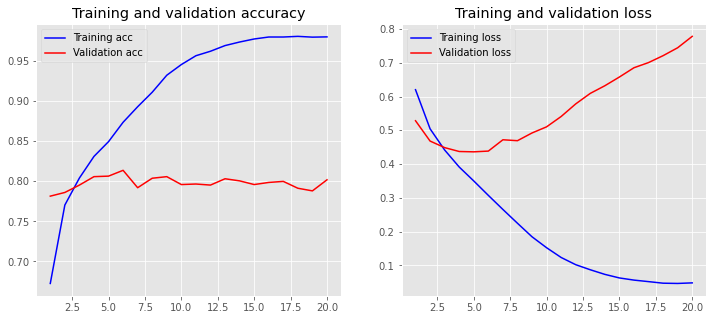

In [105]:
plot_history(history)

### Otro tipo de modelo usando varios imputs

# Realizar predicción y creacion del submit

In [52]:
predicciones=grid.predict(X_test_pad)

In [40]:
#ahora se hace la prediccion
predicciones=red_neuronal.predict(X_test_pad)

NameError: name 'red_neuronal' is not defined

In [38]:
resultado=[]
for numero in predicciones:
    if numero>=0.5:
        resultado.append(1)
    else:
        resultado.append(0)

In [48]:
resultado=[]
for numero in predicciones:
    string=str(numero)
    if('1' in string):
        resultado.append(1)
    else:
        resultado.append(0)


In [49]:
print(str(resultado[0]))

1


In [50]:
sampleSubmission=pd.read_csv('sample_submission.csv')
output=pd.DataFrame({'id':sampleSubmission.id,'target':resultado})
output.to_csv('submission.csv',index=False)

### Análisis de la cobertura despues de haber usado el desconcatenador

In [63]:
dimension_embedding=100
embedding_matrix = create_embedding_matrix(path_glove,objeto_tokenizador.word_index, dimension_embedding)


nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements/tamanio_de_vocabulario)

0.6375194236474079
